In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import cartopy.feature as cfeat
import cartopy.crs as ccrs
import seaborn as sns
from datetime import date
from datetime import timedelta

In [2]:
str1 = "/media/rghoshal/D4A6E10AA6E0EE44/UGP/ssh_grids_v1812_"
curr = date(1993,1,5)
str2 = "12.nc"
str3 = str1 + ''.join(e for e in str(curr) if e.isalnum()) + str2
area = xr.open_mfdataset(str3)
while curr <= date(1995,12,1):
    curr += timedelta(days = 30)
    str3 = str1 + ''.join(e for e in str(curr) if e.isalnum()) + str2
    area = xr.merge([area,xr.open_mfdataset(str3)])

area = area.transpose()
area

<xarray.Dataset>
Dimensions:      (Latitude: 960, Longitude: 2160, Time: 37, nv: 2)
Coordinates:
  * Time         (Time) datetime64[ns] 1993-01-05T12:00:00 ... 1995-12-21T12:...
  * Longitude    (Longitude) float32 0.083333336 0.25 ... 359.75 359.91666
  * Latitude     (Latitude) float32 -79.916664 -79.75 ... 79.75 79.916664
Dimensions without coordinates: nv
Data variables:
    Lon_bounds   (nv, Longitude) float32 dask.array<chunksize=(2, 2160), meta=np.ndarray>
    Lat_bounds   (nv, Latitude) float32 dask.array<chunksize=(2, 960), meta=np.ndarray>
    Time_bounds  (nv, Time) datetime64[ns] dask.array<chunksize=(2, 37), meta=np.ndarray>
    SLA          (Latitude, Longitude, Time) float32 dask.array<chunksize=(960, 2160, 37), meta=np.ndarray>
    SLA_ERR      (Latitude, Longitude, Time) float32 dask.array<chunksize=(960, 2160, 37), meta=np.ndarray>

In [ ]:
x = area.to_dataframe()
x

In [3]:
def make_figure():
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#     generate a basemap with country borders, oceans and coastlines
    ax.add_feature(cfeat.LAND)
    ax.add_feature(cfeat.OCEAN)
    ax.add_feature(cfeat.COASTLINE)
    ax.add_feature(cfeat.BORDERS, linestyle='dotted')
    return fig, ax

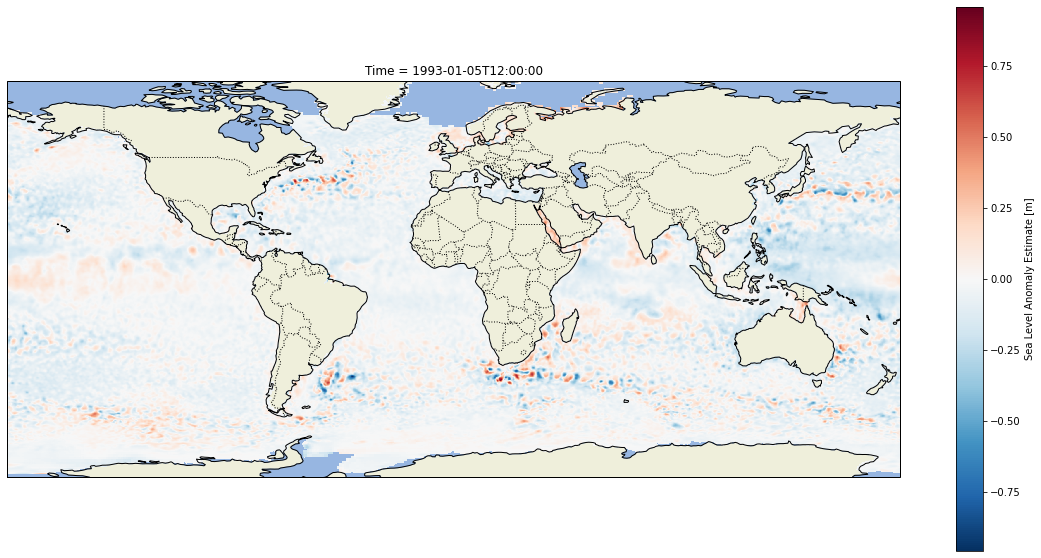

In [4]:
_, ax = make_figure()
grid = area.isel(Time=0).SLA
grid.plot(ax=ax, transform=ccrs.PlateCarree())

In [11]:
fig, ax = make_figure()

frames = area.Time.size                   # Number of frames
min_value = float(area.SLA.min().values)  # Lowest value
max_value = float(area.SLA.max().values)  # Highest value

def draw(frame, add_colorbar):
    grid = area.isel(Time=frame).SLA
    contour = grid.plot(ax=ax, transform=ccrs.PlateCarree(),add_colorbar=add_colorbar, vmin=min_value, vmax=max_value ,cmap = "coolwarm")
    title = "Time - " + str(grid.Time.values)
    ax.set_title(title)
    return contour


def init():
    return draw(0, add_colorbar=True)


def animate(frame):
    return draw(frame, add_colorbar=False)


ani = animation.FuncAnimation(fig, animate, frames, interval=0.01, blit=False,init_func=init, repeat=False)
plt.close(fig)

In [12]:
ani.save('sla.mp4', writer=animation.FFMpegWriter(fps=5))